<div class="markdown-google-sans">

# **Fine Tuning Transformers DistilBERT for Lexical Evaluation 🤗**

Fine Tuning Transformers DistilBERT for Lexical Evaluation with CEFR Lexical Dataset.

</div>


<div class="markdown-google-sans">

## **Information 😲**
</div>

**Title:** Fine Tuning Transformers DistilBERT for Lexical Evaluation<br>
**Description:** Fine Tuning Transformers DistilBERT for Lexical Evaluation with CEFR Lexical Dataset<br>
**Code Writer:** Hafid Ikhsan Arifin<br>
**Date created:** 2023/07/19<br>
**Last modified:** 2023/07/23 (2:40 PM)<br> <!-- Edit Here -->
**Version:** 4.3.0<br> <!-- Edit Here -->
**Testing Type:** Batch Size<br> <!-- Edit Here -->

**Testing information:**

<!-- Edit Here -->
| Version | Batch Size | Loss | Accuracy | F1 Score | Precision | Recall | Used | Best |
|---------| ---------- | ---- | -------- | -------- | --------- | ------ | ---- | ---- |
| 1       | 8          | 1.823 | 0.626 | 0.626 | 0.633 | 0.626 |  ✅  |  ✅  |
| 2       | 16         | 1.620 | 0.587 | 0.585 | 0.589 | 0.587 |    |    |
| 3       | 32         | 1.340 | 0.602 | 0.603 | 0.607 | 0.602 |    |    |
| 4       | 64         | 1.193 | 0.594 | 0.590 | 0.591 | 0.594 |    |    |


**Hyperparameter information:**

```bash
TEST_SIZE = 0.5
VAL_SIZE = 0.5
DATA_TYPE = Balance
LEARNING_RATE = 1e-4
NUM_EPOCHS = 5
```

**Notebook:**<br>
Best Version: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Np_hMst0_T-U8ReKjDVjeV8sOvcyYBDy?usp=sharing)<br>
Full Version: [![GitHub watchers](https://img.shields.io/github/watchers/Naereen/StrapDown.js.svg?style=social&label=Watch&maxAge=2592000)](https://github.com/IELTSSpeakingApplication/MachineLearning)

**Model:**<br>
[![Open in Spaces](https://huggingface.co/datasets/huggingface/badges/raw/main/open-in-hf-spaces-sm.svg)](https://huggingface.co/hafidikhsan)

<div class="markdown-google-sans">

## **Introduction 🤔**
</div>

Text classification is one type of activity which can determine the class label output from the text data. Text classification is a common NLP task that assigns a label or class to text. This task requires text data as input and will output class labels from the input data obtained. Some of the largest companies run text classification in production for a wide range of practical applications. This task is usually used in such as identifying spam detection, sentiment analayze, etc. Currently activities or tasks are made easier by a machine.

For now, many technology can be applied for this task. [DistilBERT](https://huggingface.co/docs/transformers/model_doc/distilbert) is one of the NLP task that can be use in my task. The [DistilBERT](https://huggingface.co/docs/transformers/model_doc/distilbert) model was proposed in the blog post [Smaller, faster, cheaper, lighter: Introducing DistilBERT, a distilled version of BERT](https://medium.com/huggingface/distilbert-8cf3380435b5), and the paper DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter. DistilBERT is a small, fast, cheap and light Transformer model trained by distilling BERT base. It has 40% less parameters than bert-base-uncased, runs 60% faster while preserving over 95% of BERT’s performances as measured on the GLUE language understanding benchmark.

In this notebook, I will shows how to fine tune [distilbert-base-uncased](https://huggingface.co/distilbert-base-uncased) pretrained speech models for text classification. We will do text classification using [distilbert-base-uncased](https://huggingface.co/distilbert-base-uncased) pretrained model and [CEFR Lexical](https://huggingface.co/hafidikhsan) Dataset.

[CEFR Lexical](https://huggingface.co/hafidikhsan) Dataset is a dataset that consist of 4 dataset that is [CEFR-SP](https://github.com/yukiar/CEFR-SP), [Kaggle CEFR Levelled English Texts](https://www.kaggle.com/datasets/amontgomerie/cefr-levelled-english-texts), [CERD](https://ilexir.co.uk/datasets/index.html), and [Hugging Face](https://huggingface.co/datasets/sebastiaan/test-cefr) for CEFR text classification. The dataset that I use consists of several columns like:

*   `Text`
*   `Level`
*   `Text Count`

The dataset is already preprocess in this [notebook](https://colab.research.google.com/drive/1m7vMsCtwpM9i9A2zfNAVnhRHQVWGmuSd?usp=sharing) and available in my Hugging Face dataset Hub profile [hafidikhsan](https://huggingface.co/hafidikhsan).

Following are the configuration details of the DistilBERT model.

```bash
OUTPUT_DIR = "distilbert-base-uncased-english-cefr-lexical-evaluation-bs-v3"
TEST_SIZE = 0.5
VAL_SIZE = 0.5
LEARNING_RATE = 1e-4
BATCH_SIZE = 8
NUM_EPOCHS = 5
EVALUATION_STRATEGY = "epoch"
SAVE_STRATEGY = "epoch"
WARMUP_RATIO = 0.1
LOGGING_STEPS = 50
LOAD_BEST_MODEL_AT_END = True
METRIC_FOR_BEST_MODEL = "accuracy"
PUSH_TO_HUB = False
GRADIENT_ACCUMULATION_STEPS = 1
WEIGHT_DECAY = 0.01
```

To evaluate the model, I decided to use Loss, Accuracy, F1 Score, Precision, and Recall from Hugging Face [Evaluate](https://huggingface.co/docs/evaluate/index) library.

In this notebook there are several sections to fine tune [distilbert-base-uncased](https://huggingface.co/distilbert-base-uncased) pretrained NLP models for CEFR lexical evaluation classification.

1.   Information 😲
2.   Introduction 🤔
3.   Preparation 🧐
4.   Collect Dataset 😥
5.   Preprocessing 😱
6.   Training 🫣
7.   Evaluation 🤯
8.   Prediction 🥳
9.   Reference 🫡

Let's code 😋

<div class="markdown-google-sans">

## **Preparation 🧐**
</div>

Before starting fine tune the model, I will do several stages.

<div class="markdown-google-sans">

### **Install PyTorch GPU Accelerate ✅**
</div>

First, I need to install PyTorch GPU Accelerate to accelerate the GPU during fine tune the model.

In [1]:
# Install PyTorch GPU Accelerate
%%capture
!pip install accelerate -U

Important, after install PyTorch GPU Accelerate, must restart the runtime ❗️

<div class="markdown-google-sans">

### **Install Necessary Libraries ✅**
</div>

Next, I will make sure all the necessary libraries installed.

In [1]:
# Install necessary library
%%capture
!pip install transformers datasets evaluate scikit-plot

In [2]:
#@title Check installed library
import datasets
import evaluate
import scikitplot
import transformers

try:
    datasets_version = datasets.__version__
    evaluate_version = evaluate.__version__
    scikitplot_version = scikitplot.__version__
    transformers_version = transformers.__version__
    print("Libraries installed")
except:
    print("Libraries not installed")

Libraries installed


<div class="markdown-google-sans">

### **Import Libraries ✅**
</div>

Next, I will import all the necessary libraries.

In [3]:
# Import library
import time
import torch
import random
import datetime
import evaluate
import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import metrics
from google.colab import drive
from huggingface_hub import notebook_login
from sklearn.metrics import classification_report, confusion_matrix
from datasets import load_dataset, concatenate_datasets, DatasetDict
from transformers import AutoTokenizer, DataCollatorWithPadding, AutoModelForSequenceClassification, TrainingArguments, Trainer, AutoConfig, pipeline

<div class="markdown-google-sans">

### **Import Drive Folder ✅**
</div>

Next, I will import drive folder in my colab to save fine tuning result.

In [4]:
# Drive Access
drive.mount("/content/drive")

Mounted at /content/drive


<div class="markdown-google-sans">

### **Login Hugging Face Hub ✅**
</div>

Next, I will login to Hugging Face Hub to save fine tune model in Hugging Face Hub.

In [5]:
# Hugging Face login
notebook_login()

<div class="markdown-google-sans">

### **Define Global Parameters ✅**
</div>

Last before fine tune model, I will define all global parameters needed.

In [6]:
# Global parameter
HUGGING_FACE_DATASET = "hafidikhsan/cefr-lexical-balance-dataset-50-50-50"

BASE_MODEL = "distilbert-base-uncased"
MODEL_NAME = "distilbert-base-uncased-english-cefr-lexical-evaluation-bs-v3"
HUGGING_FACE_MODEL = "hafidikhsan/" + MODEL_NAME

TEST_SIZE = 0.5
VAL_SIZE = 0.5
LEARNING_RATE = 1e-4
BATCH_SIZE = 8
NUM_EPOCHS = 5
SAVE_TO_HUB = False

LABELS_COLUMN = "label"
PREDICT_COLUMN = "predict"

TRAIN_DATASET = "train"
TEST_DATASET = "test"
VAL_DATASET = "validation"

COLAB_BASE_PATH = "/content/"
DRIVE_TARGET_PATH = '''/content/drive/MyDrive/Capstone/Lexical/Testing/"BS V3"'''

PNG = ".png"

MODEL_EVALUATION = '"Model Evaluation"'
CM_EVALUATION = '"Confusion Matrix Evaluation"'
CR_EVALUATION = '"Classification Report Evaluation"'
FINE_TUNING_TIME = '"Fine Tuning Time"'

MODEL_EVALUATION_PNG = "Model Evaluation.png"
CM_EVALUATION_PNG = "Confusion Matrix Evaluation.png"
CR_EVALUATION_PNG = "Classification Report Evaluation.png"
FINE_TUNING_TIME_PNG = "Fine Tuning Time.png"

TITLE = '"DistilBERT CEFR Lexical Model Batch Size Testing V3"'
DESCRIPTION = '"Fine Tuning DistilBERT CEFR Lexical Model Batch Size Testing V3 for Lexical Evaluation"'

<div class="markdown-google-sans">

## **Collect Dataset 😥**
</div>

The first stage to fine tune CEFR Lexical classification is collect dataset.

<div class="markdown-google-sans">

### **Download Dataset ✅**
</div>

Start by download the my CEFR Lexical Dataset Dataset from the 🤗 Datasets library.

In [7]:
# Load dataset
dataset = load_dataset(HUGGING_FACE_DATASET)

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/2763 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1381 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1382 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/hafidikhsan___parquet/hafidikhsan--cefr-lexical-balance-dataset-50-50-50-1a34d2e941b2829e/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

<div class="markdown-google-sans">

### **Get Label Information ✅**
</div>

To make it easier for the model to get the label name from the label id, let's create an `id2label` dictionary to decode them back to strings and see what they are. The inverse `label2id` will be useful too, when we load the model later.

In [8]:
# Get labels names
labels = dataset[TRAIN_DATASET].features[LABELS_COLUMN].names

# Create dict to save labels and id
label2id, id2label = dict(), dict()

# Looping to get label to id and id to label
for i, label in enumerate(labels):
    label2id[label] = str(i)
    id2label[str(i)] = label

In [9]:
# Display id to label
id2label

{'0': 'A1', '1': 'A2', '2': 'B1', '3': 'B2', '4': 'C1', '5': 'C2'}

In [10]:
# Display label to id
label2id

{'A1': '0', 'A2': '1', 'B1': '2', 'B2': '3', 'C1': '4', 'C2': '5'}

Another information need for fine tune model is number of class.

In [11]:
# Get list of label
label_list = dataset[TRAIN_DATASET].unique(LABELS_COLUMN)

# Get number of label
num_labels = len(label_list)
num_labels

6

<div class="markdown-google-sans">

### **Display Dataset ✅**
</div>

Last for this section is, dispay the dataset information.

In [12]:
# Display dataset information
dataset

DatasetDict({
    train: Dataset({
        features: ['Text', 'label', 'Text Count'],
        num_rows: 2763
    })
    validation: Dataset({
        features: ['Text', 'label', 'Text Count'],
        num_rows: 1381
    })
    test: Dataset({
        features: ['Text', 'label', 'Text Count'],
        num_rows: 1382
    })
})

<div class="markdown-google-sans">

## **Preprocessing 😱**
</div>

Before fine tune model, another important step is preprocessing dataset before fine tune model.

<div class="markdown-google-sans">

### **Define Tokenizer ✅**
</div>

First I load a DistilBERT Tokenizer to process the text with [`AutoTokenizer`](https://huggingface.co/docs/transformers/model_doc/auto#transformers.AutoTokenizer).

In [13]:
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)

In [14]:
# Display tokenizer information
tokenizer

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

<div class="markdown-google-sans">

### **Preprocessing Dataset ✅**
</div>

Create a preprocessing function to tokenize `Text` and truncate sequences to be no longer than DistilBERT's maximum input length:

In [15]:
# Define preprocess function
def preprocess_function(examples):
    return tokenizer(examples["Text"], truncation=True)

To apply the preprocessing function over the entire dataset, use 🤗 Datasets [map](https://huggingface.co/docs/datasets/main/en/package_reference/main_classes#datasets.Dataset.map) function. This will apply the function on all the elements of all the splits in `dataset`, so our training and testing data will be preprocessed in one single command. It can be speed up `map` by setting `batched=True` to process multiple elements of the dataset at once.

In [16]:
# Mapping preprocess to dataset
dataset = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/2763 [00:00<?, ? examples/s]

Map:   0%|          | 0/1381 [00:00<?, ? examples/s]

Map:   0%|          | 0/1382 [00:00<?, ? examples/s]

In [17]:
# Display dataset information after preprocess
dataset

DatasetDict({
    train: Dataset({
        features: ['Text', 'label', 'Text Count', 'input_ids', 'attention_mask'],
        num_rows: 2763
    })
    validation: Dataset({
        features: ['Text', 'label', 'Text Count', 'input_ids', 'attention_mask'],
        num_rows: 1381
    })
    test: Dataset({
        features: ['Text', 'label', 'Text Count', 'input_ids', 'attention_mask'],
        num_rows: 1382
    })
})

<div class="markdown-google-sans">

### **Display random data ✅**
</div>

To get a sense of what the pronunciation level sound like, the following snippet will render
some audio examples picked randomly from the dataset.

**Note**: *To listen different audio samples, we can run the following cell a couple of times.*

In [18]:
# Display random data
for _ in range(2):
    rand_idx = random.randint(0, len(dataset[TRAIN_DATASET])-1)
    data = dataset[TRAIN_DATASET][rand_idx]

    print("Label:", id2label[str(data[LABELS_COLUMN])])
    print("Text:", data["Text"])
    print("Word Count:", data["Text Count"])
    print()

Label: C2
Text: To offset the synthetic look of his plastic screen and stainless steel kitchen Gilbert laid the floors with a light wood And while his futuristic chairs and sofas litter the flat its also stuffed with rather more sentimental and homely furniture given to him by his parents or bought from markets
Word Count: 51

Label: A1
Text: However I reference some of the literature I find useful in my introduction to each section and include a timeline of relevant historical events
Word Count: 24



<div class="markdown-google-sans">

## **Training 🫣**
</div>

Now we into the main section, I will fine tune model.

<div class="markdown-google-sans">

### **Load Pretraining Model ✅**
</div>

Next step I will load the [distilbert-base-uncased](https://huggingface.co/distilbert-base-uncased) pretrained checkpoint model. For classification we use the [`AutoModelForSequenceClassification`](https://huggingface.co/docs/transformers/v4.31.0/en/model_doc/auto#transformers.AutoModelForSequenceClassification) class to load model. Like with the feature extractor, the `from_pretrained` method will download and cache the model. As the label ids and the number of labels are dataset dependent, I pass `num_labels`, `label2id`, and `id2label` alongside the `model_checkpoint` here.

In [19]:
# Load pretrain model
model = AutoModelForSequenceClassification.from_pretrained(
    BASE_MODEL,
    num_labels = num_labels,
    id2label = id2label,
    label2id = label2id
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
# Display model information
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

<div class="markdown-google-sans">

### **Define Data Collator ✅**
</div>

Next I will define data collator.

In [21]:
# Define data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

<div class="markdown-google-sans">

### **Define Evaluation Metrics ✅**
</div>

Next, the evaluation metric is defined. Including a metric during training is often helpful for evaluating model's performance. There are many pre-defined metrics for classification. But in this case, I would use `Accuracy`, `F1`, `Precision` and
`Recall` for classification evaluation metric. To load evaluation metric I use evaluation method with the 🤗 [Evaluate](https://huggingface.co/docs/evaluate/index) library.

Before I load evaluation metric, I must define `ConfiguredMetric` class because I load more than 1 evaluation metric that use average.

In [22]:
# Define configure metric class
class ConfiguredMetric:
    def __init__(self, metric, *metric_args, **metric_kwargs):
        self.metric = metric
        self.metric_args = metric_args
        self.metric_kwargs = metric_kwargs

    def add(self, *args, **kwargs):
        return self.metric.add(*args, **kwargs)

    def add_batch(self, *args, **kwargs):
        return self.metric.add_batch(*args, **kwargs)

    def compute(self, *args, **kwargs):
        return self.metric.compute(*args, *self.metric_args, **kwargs, **self.metric_kwargs)

    @property
    def name(self):
        return self.metric.name

    def _feature_names(self):
        return self.metric._feature_names()

Then load the evaluation metric and create a function that passes your predictions and labels to [compute](https://huggingface.co/docs/evaluate/main/en/package_reference/main_classes#evaluate.EvaluationModule.compute) to calculate the `Accuracy`, `F1`, `Precision` and `Recall` with `weighted` average.

In [23]:
# Define metrics
clf_metrics = evaluate.combine([
    evaluate.load("accuracy"),
    ConfiguredMetric(evaluate.load("f1"), average="weighted"),
    ConfiguredMetric(evaluate.load("precision"), average="weighted"),
    ConfiguredMetric(evaluate.load("recall"), average="weighted"),
])

# Define compute_metrics function
def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)

    return clf_metrics.compute(predictions=predictions, references=eval_pred.label_ids, average="weighted")

<div class="markdown-google-sans">

### **Define Training Arguments ✅**
</div>

To instantiate a `Trainer`, need to define the training configuration and the evaluation metric. The most important is the [`TrainingArguments`](https://huggingface.co/transformers/main_classes/trainer.html#transformers.TrainingArguments), which is a class that contains all the attributes to customize the training. It requires one folder name, which will be used to save the checkpoints of the model, and all other arguments are optional.

In [24]:
# Define training argument
training_args = TrainingArguments(
    output_dir = MODEL_NAME,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate = LEARNING_RATE,
    per_device_train_batch_size = BATCH_SIZE,
    per_device_eval_batch_size = BATCH_SIZE,
    gradient_accumulation_steps = 1,
    num_train_epochs = NUM_EPOCHS,
    weight_decay = 0.01,
    warmup_ratio = 0.1,
    logging_steps = 50,
    load_best_model_at_end = True,
    metric_for_best_model = "accuracy",
    push_to_hub = SAVE_TO_HUB,
)

Then just need to pass all of this parameter along with pretrain model, datasets, data collator, feature extractor and compute metrics to the `Trainer`:

In [25]:
# Define training trainer
trainer = Trainer(
    model = model,
    data_collator = data_collator,
    args = training_args,
    train_dataset = dataset[TRAIN_DATASET],
    eval_dataset = dataset[VAL_DATASET],
    tokenizer = tokenizer,
    compute_metrics = compute_metrics,
)

<div class="markdown-google-sans">

### **Training Model ✅**
</div>

Next, define `timer` function to calculate fine tuning time.

In [26]:
# Define timer
def timer(start, end):
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

Now I can start fine tune model by calling the `train` method.

In [27]:
# Training model
print("Start fine tuning...")
date_time_fine_init = datetime.datetime.now().strftime("%Y-%m-%d at %H:%M:%S UTC")
print(date_time_fine_init + "\n")

time_fine_tunning_init = time.time()

trainer.train()

time_fine_tunning_end = time.time()
time_fine_tunning = time_fine_tunning_end - time_fine_tunning_init

print("\nEnd fine tuning...")
date_time_fine_end = datetime.datetime.now().strftime("%Y-%m-%d at %H:%M:%S UTC")
print(date_time_fine_end + "\n")

print("Fine tuning time:")
timer(time_fine_tunning_init, time_fine_tunning_end)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Start fine tuning...
2023-07-23 at 07:32:22 UTC



Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.278800,1.344236,0.499638,0.489471,0.507056,0.499638
2,1.009300,1.252119,0.566980,0.568917,0.595887,0.566980
3,0.508600,1.473245,0.590152,0.591813,0.597786,0.590152
4,0.215300,1.988060,0.601014,0.601603,0.612008,0.601014
5,0.049600,2.070516,0.600290,0.601495,0.604667,0.600290



End fine tuning...
2023-07-23 at 07:33:40 UTC

Fine tuning time:
00:01:18.03


<div class="markdown-google-sans">

## **Evaluation 🤯**
</div>

The stage is not done yet. Next I will evaluate model to get preformance of model after fine tuned.

<div class="markdown-google-sans">

### **Evaluate Model ✅**
</div>

Next section, I will evaluate my fine tuned model on the testing dataset. To evaluate model, I use [`evaluate`](https://huggingface.co/docs/transformers/v4.30.0/en/main_classes/trainer#transformers.Trainer.evaluate) method from `trainer` class. In this section will display the evaluation of the best fine tuned model checkpoint with some metrics evaluation.

In [28]:
# Evaluate model
evaluation_result = trainer.evaluate(eval_dataset=dataset[TEST_DATASET])

In [29]:
# Display evaluation result
evaluation_result

{'eval_loss': 1.8230977058410645,
 'eval_accuracy': 0.6266280752532561,
 'eval_f1': 0.6261871141519085,
 'eval_precision': 0.6332780878741416,
 'eval_recall': 0.6266280752532561,
 'eval_runtime': 1.9316,
 'eval_samples_per_second': 715.456,
 'eval_steps_per_second': 89.561,
 'epoch': 5.0}

<div class="markdown-google-sans">

### **Save Fine Tune Process in Tensorboard ✅**
</div>

Next I will save the fine tuning process in [Tensorboard](https://tensorboard.dev/experiments/).

In [30]:
# Save training to tensorboard
!tensorboard dev upload --logdir ./{MODEL_NAME}/runs \
  --name {TITLE} \
  --description {DESCRIPTION} \
  --one_shot

2023-07-23 07:33:44.363049: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./distilbert-base-uncased-english-cefr-lexical-evaluation-bs-v3/runs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) y

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   HFC-RDF-WCW



New experiment created. Vie

<div class="markdown-google-sans">

### **Push Model to Hub ✅**
</div>

Next step is save the fine tuned model to Hugging Face Hub. The model will be save in my Hugging Face Hub profile [hafidikhsan](https://huggingface.co/hafidikhsan).

Before do this section, login to Hugging Face Hub first in Preparation 🧐 section ❗️

In [31]:
# Go to model dir
%cd {MODEL_NAME}

/content/distilbert-base-uncased-english-cefr-lexical-evaluation-bs-v3


In [32]:
# Initialize git
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/distilbert-base-uncased-english-cefr-lexical-evaluation-bs-v3/.git/


In [33]:
# Git add remote
!git remote add origin

usage: git remote add [<options>] <name> <url>

    -f, --fetch           fetch the remote branches
    --tags                import all tags and associated objects when fetching
                          or do not fetch any tag at all (--no-tags)
    -t, --track <branch>  branch(es) to track
    -m, --master <branch>
                          master branch
    --mirror[=(push|fetch)]
                          set up remote as a mirror to push to or fetch from



In [34]:
# Git pull remote
!git pull origin main

fatal: 'origin' does not appear to be a git repository
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [35]:
# Push to hub model trainer
trainer.push_to_hub(MODEL_NAME)

Cloning https://huggingface.co/hafidikhsan/distilbert-base-uncased-english-cefr-lexical-evaluation-bs-v3 into local empty directory.


Upload file pytorch_model.bin:   0%|          | 1.00/255M [00:00<?, ?B/s]

Upload file training_args.bin:   0%|          | 1.00/4.00k [00:00<?, ?B/s]

To https://huggingface.co/hafidikhsan/distilbert-base-uncased-english-cefr-lexical-evaluation-bs-v3
   73ceef6..7565fc4  main -> main

   73ceef6..7565fc4  main -> main

To https://huggingface.co/hafidikhsan/distilbert-base-uncased-english-cefr-lexical-evaluation-bs-v3
   7565fc4..897f5b7  main -> main

   7565fc4..897f5b7  main -> main



'https://huggingface.co/hafidikhsan/distilbert-base-uncased-english-cefr-lexical-evaluation-bs-v3/commit/7565fc4fbf556e97766939b4af7e15ff6b2057de'

In [36]:
# Back to root dir
%cd ..

/content


<div class="markdown-google-sans">

### **Visualize Evaluation ✅**
</div>

Final step in this section is visualize the fine tuned processing end model evaluation. Before doing this step, must define some function and variable to visualize evaluation model.

In [37]:
# Get device info
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Device: {device}")

Device: cuda


In [38]:
# Load config file model
config_model = AutoConfig.from_pretrained(MODEL_NAME + "/" + MODEL_NAME)

In [39]:
# Get labels name
label_names = [config_model.id2label[i] for i in range(config_model.num_labels)]
label_names

['A1', 'A2', 'B1', 'B2', 'C1', 'C2']

In [40]:
# Define predict function
def predict(examples):
    inputs = tokenizer(examples["Text"], truncation=True, return_tensors="pt")

    with torch.no_grad():
        logits = model(**inputs.to(device)).logits

    pred_ids = logits.argmax().item()
    examples[PREDICT_COLUMN] = pred_ids

    return examples

In [41]:
# Mapping to predict function
result = dataset[TEST_DATASET].map(predict)

Map:   0%|          | 0/1382 [00:00<?, ? examples/s]

In [42]:
# Display some predict value
y_true = result[LABELS_COLUMN]
y_pred = result[PREDICT_COLUMN]

print(y_true[:5])
print(y_pred[:5])

[2, 3, 5, 4, 4]
[3, 3, 5, 4, 3]


Now we can visualize model evaluation. First we visualize model evaluation metrics on testing dataset.

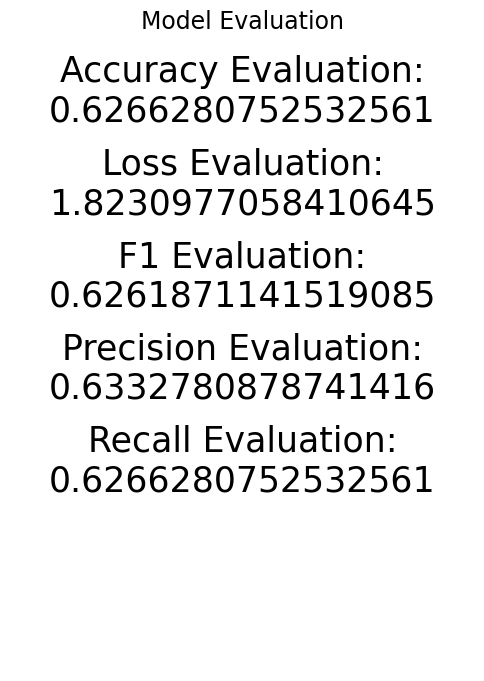

In [43]:
# Set matplotlib
fig, ax = plt.subplots(figsize=(6, 8))

# Define model evaluation metrics
eval_metrics = []
y_plot = [1, 0.85, 0.7, 0.55, 0.4]
title_plot = ["Accuracy", "Loss", "F1", "Precision", "Recall"]

acc_eval = evaluation_result["eval_accuracy"]
eval_metrics.append(acc_eval)

loss_eval = evaluation_result["eval_loss"]
eval_metrics.append(loss_eval)

f1_eval = evaluation_result["eval_f1"]
eval_metrics.append(f1_eval)

pre_eval = evaluation_result["eval_precision"]
eval_metrics.append(pre_eval)

rec_eval = evaluation_result["eval_recall"]
eval_metrics.append(rec_eval)

# Plot model evaluation metrics
for i in range(5):
    ax.text(0.5, y_plot[i], f"{title_plot[i]} Evaluation:\n{eval_metrics[i]}",
            verticalalignment="top", horizontalalignment="center",
            transform=ax.transAxes,
            color="black", fontsize=25)

plt.title(label="Model Evaluation", fontsize=17, pad=19)
plt.axis("off")

# Save plot in image
plt.savefig(MODEL_EVALUATION_PNG, dpi=300.0, transparent=True)

Next, I will display Confusion Matrix on testing dataset.

In [44]:
# Print confusion matrix
print(metrics.confusion_matrix(y_pred, y_true))

[[156  29  20  36  34  15]
 [ 14 147  16  17   7   3]
 [ 18  23 155  34  37   7]
 [ 21  23  21 110  30   3]
 [ 17   7  13  30 108  13]
 [  4   1   5   4  14 190]]


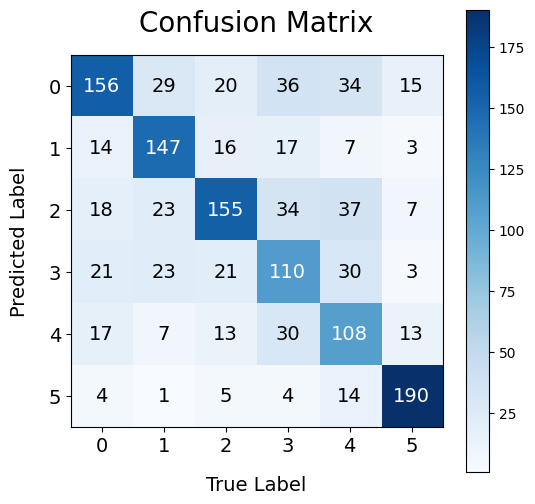

In [45]:
# Ploting confusion matrix
skplt.metrics.plot_confusion_matrix(y_pred,
                                    y_true,
                                    figsize=(6, 6),
                                    text_fontsize=14,
                                   )

plt.title(label="Confusion Matrix", fontsize=20, pad=17)
plt.ylabel("Predicted Label", labelpad=14)
plt.xlabel("True Label", labelpad=14)

# Save plot in image
plt.savefig(CM_EVALUATION_PNG, dpi=300.0)

Next, I will display Classification Report on testing dataset.

In [46]:
# Print classification report
print(metrics.classification_report(y_pred, y_true, digits=3))

              precision    recall  f1-score   support

           0      0.678     0.538     0.600       290
           1      0.639     0.721     0.677       204
           2      0.674     0.566     0.615       274
           3      0.476     0.529     0.501       208
           4      0.470     0.574     0.517       188
           5      0.823     0.872     0.846       218

    accuracy                          0.627      1382
   macro avg      0.627     0.633     0.626      1382
weighted avg      0.636     0.627     0.627      1382



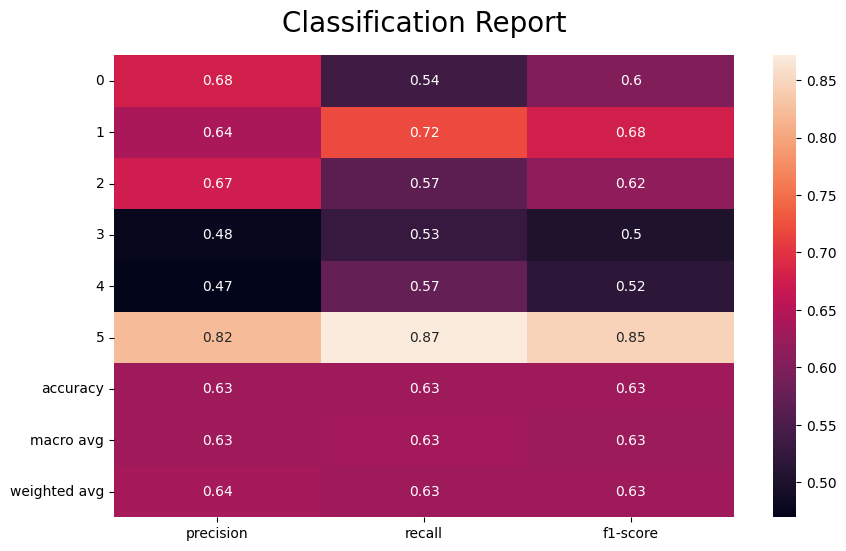

In [47]:
# Ploting classification report
fig, ax = plt.subplots(figsize=(10, 6))

clf_report = metrics.classification_report(y_pred,
                                           y_true,
                                           output_dict=True)

classification_report = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, ax=ax, annot=True)

classification_report.set_title("Classification Report", fontsize=20, pad=17)
fig = classification_report.get_figure()

# Save plot in image
fig.savefig(CR_EVALUATION_PNG, dpi=300.0)

Last, I will display fine tuning time process.

In [48]:
# Define timer
def display_timer(start, end):
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    return int(hours), int(minutes), seconds

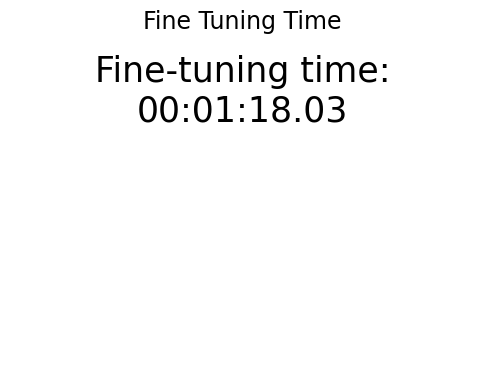

In [49]:
# Ploting training time
fig, ax = plt.subplots(figsize=(6, 4))

hours_ft, minutes_ft, seconds_ft = display_timer(time_fine_tunning_init, time_fine_tunning_end)

ax.text(0.5, 1, "Fine-tuning time:\n{:0>2}:{:0>2}:{:05.2f}".format(int(hours_ft),int(minutes_ft),seconds_ft),
        verticalalignment="top", horizontalalignment="center",
        transform=ax.transAxes,
        color="black", fontsize=25)

plt.title(label="Fine Tuning Time", fontsize=17, pad=19)
plt.axis("off")

# Save plot in image
plt.savefig(FINE_TUNING_TIME_PNG, dpi=300.0, transparent=True)

In [50]:
# Save training process
!cp -r {COLAB_BASE_PATH + MODEL_EVALUATION + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + CM_EVALUATION + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + CR_EVALUATION + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + FINE_TUNING_TIME + PNG} {DRIVE_TARGET_PATH}

<div class="markdown-google-sans">

## **Prediction 🥳**
</div>

Great, now the fine tuned model is ready to use. In the final stage, I will do some examples of the prediction process. There are 2 ways to use this fine tuned model.

<div class="markdown-google-sans">

### **Pipeline ✅**
</div>

First ways use [`pipeline`](https://huggingface.co/docs/transformers/main_classes/pipelines) function from [Transformers Hugging Face](https://huggingface.co/docs/transformers/index). To perform audio classification, we will use `audio-classification` parameter.

In [51]:
# Define timer
def timer(start, end):
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

In [52]:
# Define text
text_pipeline = "Hello my name is Hafid Ikhsan you can call me hafid"

In [53]:
# Predict
print("Start predict...")
date_time_predict = datetime.datetime.now().strftime("%Y-%m-%d at %H:%M:%S UTC")
print(date_time_predict + "\n")

time_predict_init = time.time()

# Start predict
classifier = pipeline(model=HUGGING_FACE_MODEL)
print(classifier(text_pipeline))

time_predict_end = time.time()
time_predict = time_predict_end - time_predict_init

print("\nEnd Predict...")
date_time_predict_end = datetime.datetime.now().strftime("%Y-%m-%d at %H:%M:%S UTC")
print(date_time_predict_end + "\n")

print("Predict time:")
timer(time_predict_init, time_predict_end)

Start predict...
2023-07-23 at 07:35:06 UTC



Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


[{'label': 'B1', 'score': 0.9922886490821838}]

End Predict...
2023-07-23 at 07:35:19 UTC

Predict time:
00:00:12.31


<div class="markdown-google-sans">

### **Non Pipeline ❌**
</div>

Second ways is use [`AutoModelForSequenceClassification`](https://huggingface.co/docs/transformers/v4.31.0/en/model_doc/auto#transformers.AutoModelForSequenceClassification) to load model and [`AutoTokenizer`](https://huggingface.co/docs/transformers/model_doc/auto#transformers.AutoTokenizer) to load tokenizer. In this way, use `torch` to predict.

In [ ]:
# Define text
text_nonpipeline = "Hello my name is Hafid Ikhsan you can call me hafid"

In [ ]:
# Load tokenizer and model
tokenizer_test = AutoTokenizer.from_pretrained(HUGGING_FACE_MODEL)
model_test = AutoModelForSequenceClassification.from_pretrained(HUGGING_FACE_MODEL)

inputs_test = tokenizer_test(text_nonpipeline, return_tensors="pt").to("cuda")

In [ ]:
# Predict
with torch.no_grad():
    logits = model_test(**inputs_test).logits.to("cuda")

predicted_class_id = logits.argmax().item()
model_test.config.id2label[predicted_class_id]

<div class="markdown-google-sans">

## **Reference 🫡**
</div>

<div class="markdown-google-sans">

### **Dataset ✅**
</div>

1.   [hafidikhsan/cefr-lexical-real-dataset](https://huggingface.co/datasets/hafidikhsan/cefr-lexical-real-dataset)
2.   [hafidikhsan/cefr-lexical-cut-dataset](https://huggingface.co/datasets/hafidikhsan/cefr-lexical-cut-dataset)
3.   [hafidikhsan/cefr-lexical-cut-over-dataset](https://huggingface.co/datasets/hafidikhsan/cefr-lexical-cut-over-dataset)
4.   [hafidikhsan/cefr-lexical-real-pre-dataset](https://huggingface.co/datasets/hafidikhsan/cefr-lexical-real-pre-dataset)
5.   [hafidikhsan/cefr-lexical-cut-pre-dataset](https://huggingface.co/datasets/hafidikhsan/cefr-lexical-cut-pre-dataset)
6.   [hafidikhsan/cefr-lexical-cut-over-pre-dataset](https://huggingface.co/datasets/hafidikhsan/cefr-lexical-cut-over-pre-dataset)

<div class="markdown-google-sans">

### **Code ✅**
</div>

1.   [Text classification PyTorch](https://colab.research.google.com/github/huggingface/notebooks/blob/main/transformers_doc/en/pytorch/sequence_classification.ipynb)

<div class="markdown-google-sans">

### **Website ✅**
</div>

1.   [DistilBERT](https://huggingface.co/docs/transformers/model_doc/distilbert)
1.   [Text classification](https://huggingface.co/docs/transformers/tasks/sequence_classification)